In [1]:
import corner
from read_alf import Alf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

/Users/xiaoyazhang/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


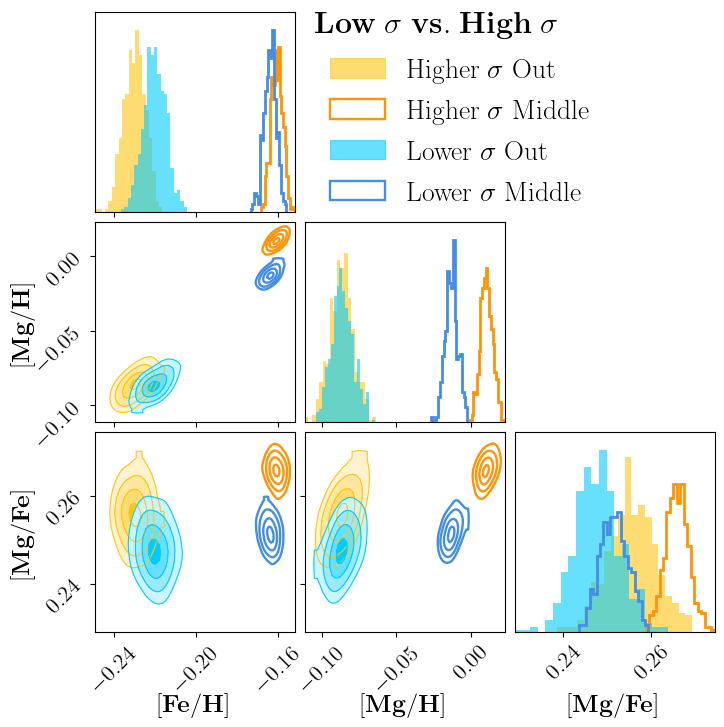

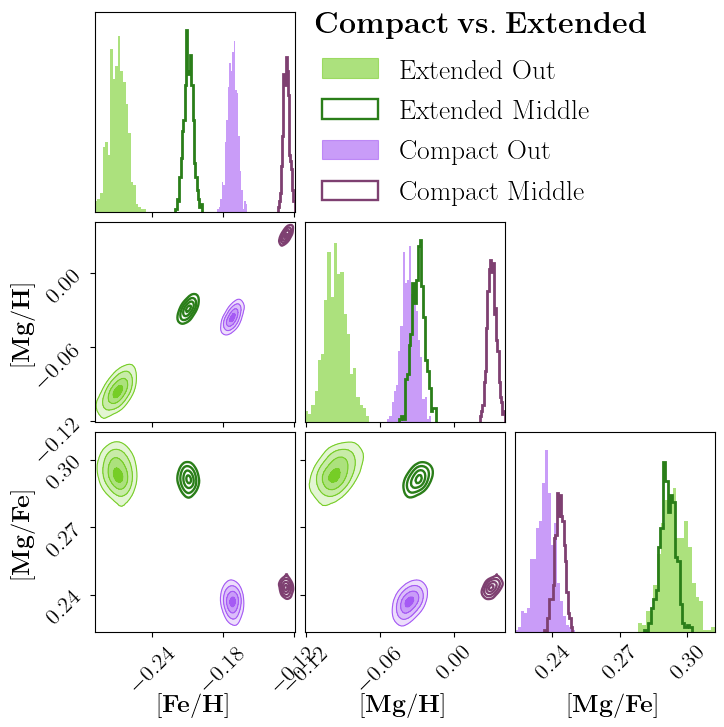

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Charter",
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "axes.labelsize": 18,
    "axes.labelweight": "bold"
    })
radii_labels = [r'$\mathrm{Inner(}\mathit{R}\mathrm{\le 0.5R_e)}$',
                r'$\mathrm{Middle(0.5R_e\le} \mathit{R}\mathrm{\le 1.0R_e)}$',
                r'$\mathrm{Outer(}\mathit{R}\mathrm{\ge 1.0R_e)}$']

split_type = ['mtot_v_m10kpc', 'sigma_v_mtot', 'm20kpc_v_sigmacen', 'm10kpc_v_m20kpc_control']

path = '../data/alf/simple/'
alfnames = ['high_nomask_in', 'low_nomask_out']
label_names = ['high', 'low']
radius_label = [r'$\mathrm{Out}$', r'$\mathrm{Middle}$']
radius_names = ['out', 'mid']
labels = ['High', 'Low']
mylabel = np.array([r'$\mathbf{[Fe/H]}$', r'$\mathbf{[Mg/H]}$', r'$\mathbf{[Mg/Fe]}$'])
params = ['Mg']
linestyles = ['solid', 'dashed']
names = ['', '_red']
titles = ['', '', r'$\mathbf{Low\ \sigma\ vs.\ High\ \sigma}$', r'$\mathbf{Compact\ vs.\ Extended}$']
for split_num in [2,3]:
    handles = []

    colors = [['xkcd:apple green', 'xkcd:tree green'],
              ['xkcd:lighter purple', 'xkcd:bruise']]
    sample_labels = [r'$\mathrm{Extended}$', r'$\mathrm{Compact}$']
    if split_num == 2:
        colors = [['xkcd:sunflower', 'xkcd:tangerine'],
                  ['xkcd:bright sky blue', 'xkcd:dark sky blue']]
        sample_labels = [r'$\mathrm{Higher\ \sigma}$', r'$\mathrm{Lower\ \sigma}$']


    for j in range(len(label_names)):
        for k in range(len(radius_names)):
            myalf=Alf(
                    path + split_type[split_num] + '/' + label_names[j] + '_' + split_type[split_num] +
                    names[0] + '_median_' + radius_names[k])

            myalf.get_total_met()

            wave = np.copy(myalf.spectra['wave'])
            labels = np.array(myalf.labels)
            mg_correct = myalf.get_corrected_abundance_posterior('Mg')
            zh_idx = np.in1d(labels, 'zH')
            feh_idx = np.in1d(labels, 'FeH')
            mgh_idx = np.in1d(labels, 'Mg')
            zh_coorrect = myalf.mcmc[:, zh_idx] + myalf.mcmc[:, feh_idx]

            use = np.in1d(labels, params)
            data = np.hstack(
                (zh_coorrect, myalf.mcmc[:, zh_idx] + myalf.mcmc[:, mgh_idx], np.array([mg_correct]).T))
            contour_kwargs = {'linewidths': [0.8, 1.7][k]}
            hist_kwargs = {'alpha': [0.6, 1][k], 'histtype': ['stepfilled', 'step'][k], 'linewidth': [0.8, 2][k]}
            if (j == 0) & (k == 0):
                figure = corner.corner(data,
                                       labels=mylabel,
                                       color=colors[j][k], plot_datapoints=False,
                                       plot_contours=True, smooth=2, max_n_ticks=3, plot_density=[True, False][k],
                                       contour_kwargs=contour_kwargs, hist_kwargs=hist_kwargs,
                                       fill_contours=[True, False][k])
            else:
                corner.corner(data, fig=figure,
                              labels=mylabel,
                              color=colors[j][k], plot_datapoints=False,
                              plot_contours=True, smooth=2, max_n_ticks=3, linestyles=linestyles[j],
                              plot_density=[True, False][k],
                              contour_kwargs=contour_kwargs, hist_kwargs=hist_kwargs, fill_contours=[True, False][k])
            handles.append(
                mpatches.Patch(facecolor=[colors[j][k], 'None'][k], alpha=[0.6, 1][k], edgecolor=colors[j][k],
                               lw=[0.8, 1.7][k], label=sample_labels[j] + ' ' + radius_label[k]))

    plt.legend(
        handles=handles,
        fontsize=20, frameon=False,
        bbox_to_anchor=(0.5, 3), loc="upper right")
    plt.text(-1, 3.0, titles[split_num], transform=plt.gca().transAxes, fontsize=22)
